In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import re

In [41]:
station = pd.read_csv("./094/station.csv", sep='\t', engine="python")
patient = pd.read_csv("./094/patient.csv", sep='\t', engine="python")
observation = pd.read_csv("./094/observation.csv", sep='\t', engine="python")

## 2.1 A

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = observation['oximetry'].values
x = observation.drop(columns=['oximetry'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train_df = X_train.copy()
# train_df["oximetry"] = y_train
# 
# test_df = X_test.copy()
# test_df["oximetry"] = y_test
# 
# train_df.to_csv("train_raw.csv", index=False)
# test_df.to_csv("test_raw.csv", index=False)

## 2.1 B

In [44]:
import pandas as pd

X_train = pd.DataFrame(X_train)

In [45]:
X_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

In [46]:
X_train.isnull().sum().sum()

np.int64(0)

In [47]:
X_train.duplicated().sum()

np.int64(0)

## 2.1 C

In [57]:
from scipy.stats import skew

skews = skew(X_train, axis=0)

skew_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Skewness': skews
})

skew_df

,Feature,Skewness
0,0,-0.091429
1,1,0.012986
2,2,0.205774
3,3,-0.022859
4,4,0.027332
5,5,0.021505
6,6,0.006685
7,7,0.008181
8,8,-0.420300
9,9,0.120718


Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_mm = scaler.fit_transform(X_train) 

X_mm

array([[0.45276178, 0.50565087, 0.25645509, ..., 0.68601394, 0.603708  ,
        0.17673603],
       [0.58886547, 0.55577968, 0.6179188 , ..., 0.0551144 , 0.79828603,
        0.23083105],
       [0.5288536 , 0.46830527, 0.31574099, ..., 0.953799  , 1.        ,
        0.51727084],
       ...,
       [0.41719763, 0.53771322, 0.31790977, ..., 0.63543271, 0.66930273,
        0.70221359],
       [0.53492046, 0.5403468 , 0.34789105, ..., 0.55731244, 0.68780225,
        0.69049618],
       [0.56248983, 0.36472526, 0.40685264, ..., 0.74105148, 0.97613058,
        0.54000764]])

In [50]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_std = scaler.fit_transform(X_train) 

X_std

array([[-0.61285113,  0.16958797, -1.02446594, ...,  0.65197328,
        -0.44608858, -1.4207134 ],
       [ 0.46388163,  0.5730105 ,  0.86314176, ..., -1.53898888,
         0.60766575, -1.17568571],
       [-0.01087947, -0.1309589 , -0.71486771, ...,  1.58192631,
         1.70006538,  0.12176615],
       ...,
       [-0.8942034 ,  0.42761672, -0.70354212, ...,  0.47631684,
        -0.09085455,  0.95947903],
       [ 0.03711616,  0.448811  , -0.5469762 , ...,  0.20502395,
         0.00933123,  0.90640411],
       [ 0.25522079, -0.96454168, -0.23907157, ...,  0.84310539,
         1.57079847,  0.22475429]])

In [59]:
import numpy as np

print("StandardScaler:")
print("Среднее =", np.mean(X_train, axis=0).round(3))
print("Ст. отклонение =", np.std(X_train, axis=0).round(3))

print("\nMinMaxScaler:")
print("Минимум =", np.min(X_train, axis=0).round(3))
print("Максимум =", np.max(X_train, axis=0).round(3))

StandardScaler:
Среднее = 0      97.541
1      79.383
2       8.724
3      16.139
4      39.649
5      59.381
6     117.756
7     104.438
8      35.982
9      10.948
10     15.311
11     14.717
12     80.903
13      4.099
14     45.595
15     47.458
16     46.789
17     49.718
18      0.249
19     29.965
20     29.998
21      7.550
dtype: float64
Ст. отклонение = 0      0.606
1      4.970
2      3.496
3      1.036
4      1.429
5     10.745
6     21.867
7      4.088
8      0.846
9      1.447
10     1.583
11     0.719
12     4.982
13     0.135
14    12.267
15    11.966
16    12.199
17    14.054
18     0.029
19     5.759
20    22.823
21    73.843
dtype: float64

MinMaxScaler:
Минимум = 0      95.000
1      60.000
2       0.460
3      12.000
4      35.194
5      21.000
6      36.951
7      90.000
8      33.000
9       5.736
10     10.000
11     12.059
12     60.000
13      4.000
14      1.091
15      0.000
16      0.000
17      0.000
18      0.200
19     20.000
20    -54.800
21   -156.474


In [52]:
import numpy as np

print("StandardScaler:")
print("Среднее =", np.mean(X_std, axis=0).round(3))
print("Ст. отклонение =", np.std(X_std, axis=0).round(3))

print("\nMinMaxScaler:")
print("Минимум =", np.min(X_mm, axis=0).round(3))
print("Максимум =", np.max(X_mm, axis=0).round(3))

StandardScaler:
Среднее = [-0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.
  0. -0.  0.  0.]
Ст. отклонение = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

MinMaxScaler:
Минимум = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Максимум = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Transformers

(array([   6.,   64.,  285., 1054., 2476., 2959., 1972.,  718.,  115.,
          15.]),
 array([95.        , 95.47914432, 95.95828863, 96.43743295, 96.91657726,
        97.39572158, 97.8748659 , 98.35401021, 98.83315453, 99.31229884,
        99.79144316]),
 <BarContainer object of 10 artists>)

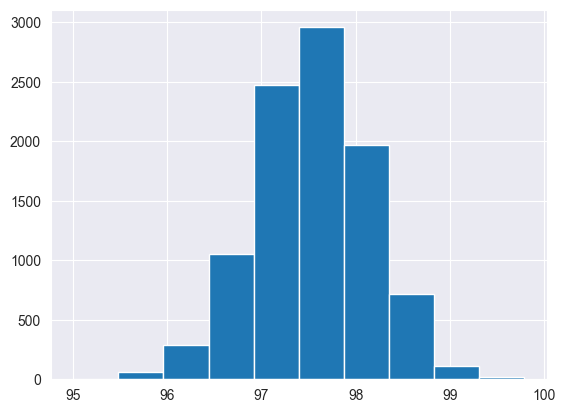

In [60]:
from matplotlib import pyplot

pyplot.hist(X_train[0], bins=10)

(array([2., 2., 4., 2., 6., 2., 3., 0., 0., 1.]),
 array([-1.38342245, -1.02586157, -0.66830069, -0.31073981,  0.04682107,
         0.40438195,  0.76194283,  1.11950372,  1.4770646 ,  1.83462548,
         2.19218636]),
 <BarContainer object of 10 artists>)

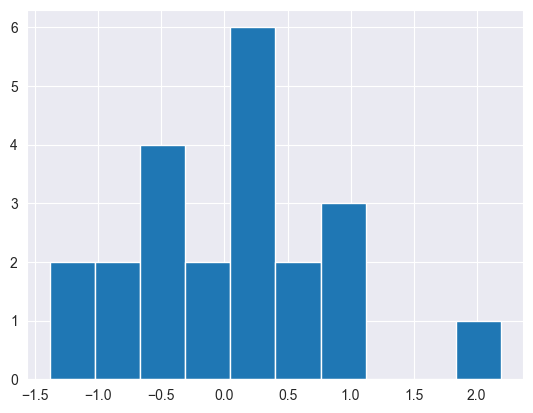

In [54]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=True) 
X_pt = power.fit_transform(X_train)

pyplot.hist(X_pt[0], bins=10) 

(array([   6.,   64.,  285., 1054., 2476., 2959., 1972.,  718.,  115.,
          15.]),
 array([95.        , 95.47914432, 95.95828863, 96.43743295, 96.91657726,
        97.39572158, 97.8748659 , 98.35401021, 98.83315453, 99.31229884,
        99.79144316]),
 <BarContainer object of 10 artists>)

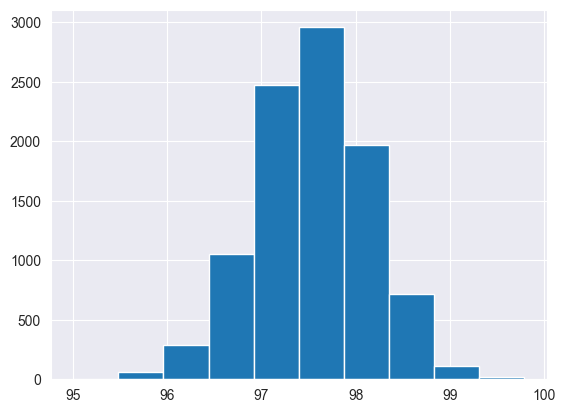

In [55]:
pyplot.hist(X_train[0], bins=10)

(array([1., 3., 4., 0., 7., 4., 2., 0., 0., 1.]),
 array([-1.52955819, -1.15861239, -0.78766659, -0.41672079, -0.04577499,
         0.32517081,  0.69611661,  1.06706241,  1.43800821,  1.80895401,
         2.17989981]),
 <BarContainer object of 10 artists>)

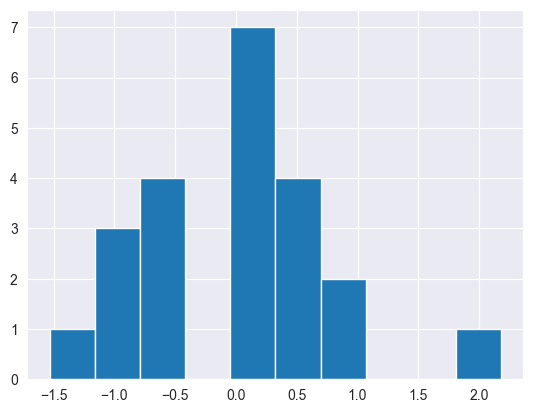

In [63]:
from sklearn.preprocessing import QuantileTransformer

power = QuantileTransformer(output_distribution='normal', random_state=42)
X_qt = power.fit_transform(X_train)

pyplot.hist(X_qt[0], bins=10)